# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

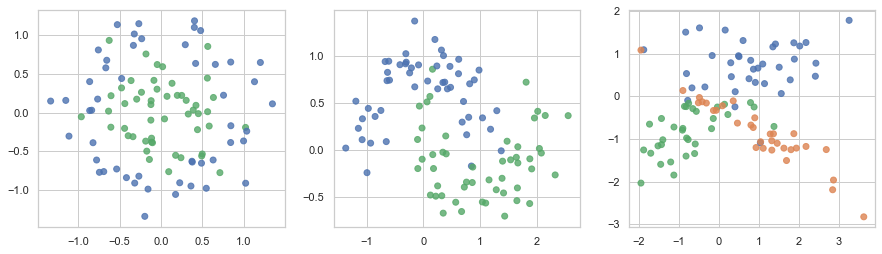

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

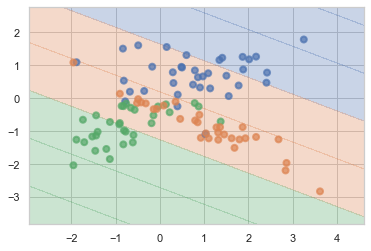

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

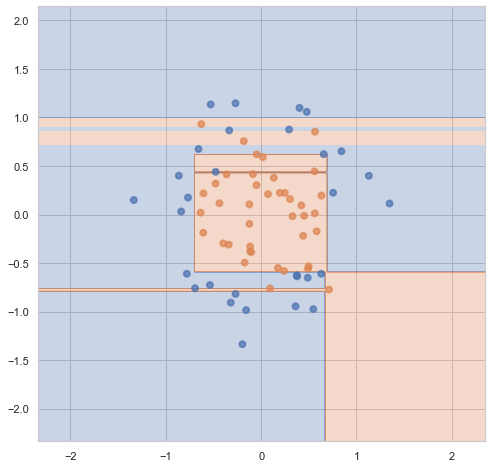

Train accuracy= 1.0
Test accuracy= 0.7333333333333333


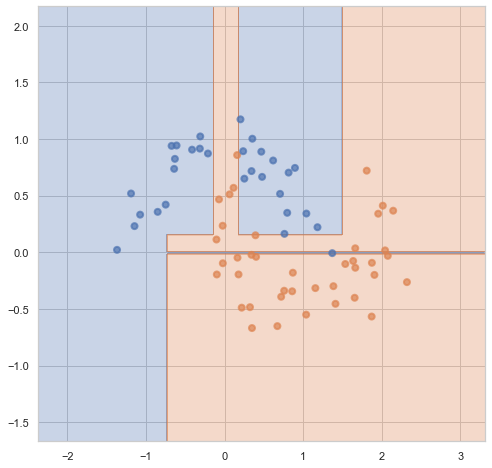

Train accuracy= 1.0
Test accuracy= 0.8666666666666667


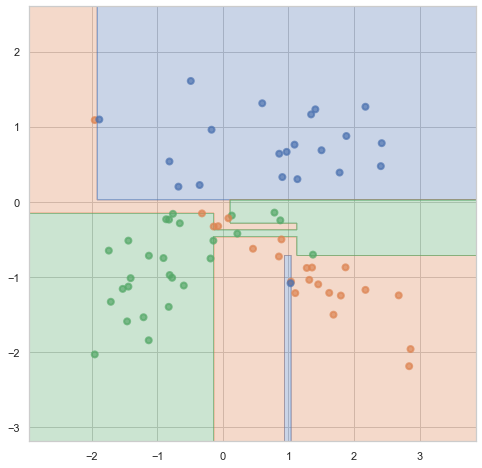

Train accuracy= 1.0
Test accuracy= 0.8333333333333334


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


for i in range(len(datasets)):
    X_train, X_test, y_train, y_test = train_test_split(datasets[i][0], datasets[i][1], test_size=0.3, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    plt.figure(figsize=(8, 8))
    plot_surface(clf, X_train, y_train)
    plt.show()
    print("Train accuracy=", accuracy_score(y_train, clf.predict(X_train))) 
    print("Test accuracy=", accuracy_score(y_test, clf.predict(X_test)))

__Ответ:__ Да. В 1 и 3 особенно.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

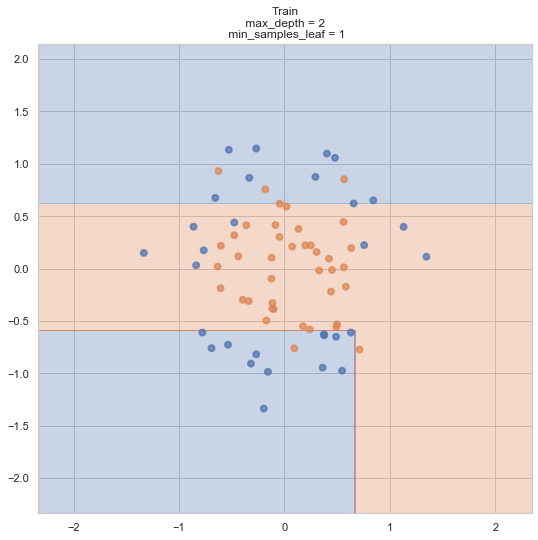

train accuracy = 0.8285714285714286
test accuracy = 0.6333333333333333


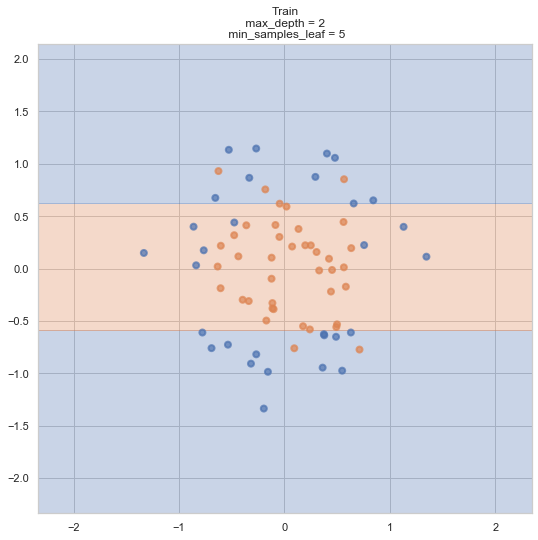

train accuracy = 0.8142857142857143
test accuracy = 0.6666666666666666


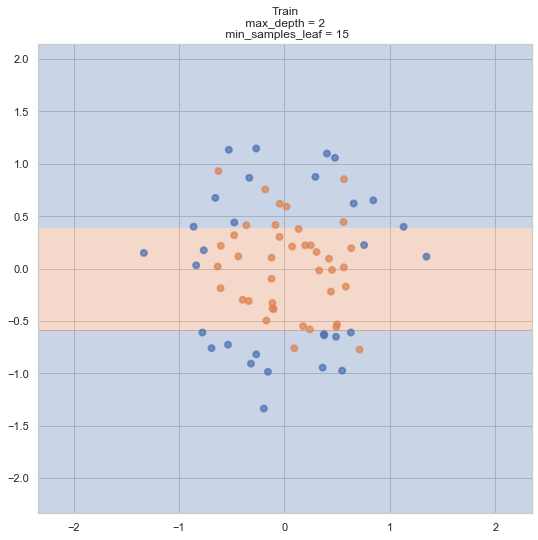

train accuracy = 0.7857142857142857
test accuracy = 0.7


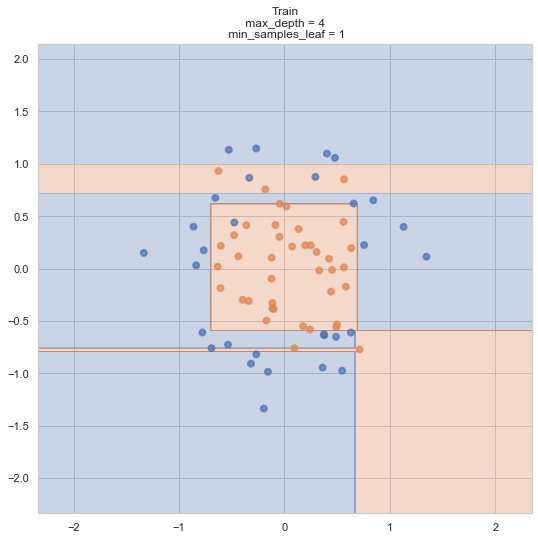

train accuracy = 0.9571428571428572
test accuracy = 0.7333333333333333


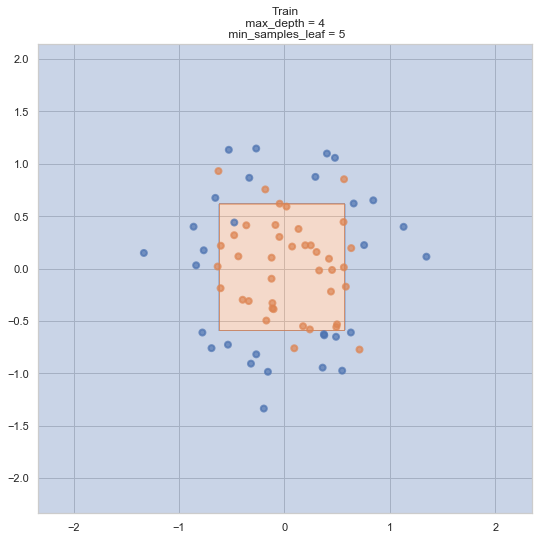

train accuracy = 0.8714285714285714
test accuracy = 0.9


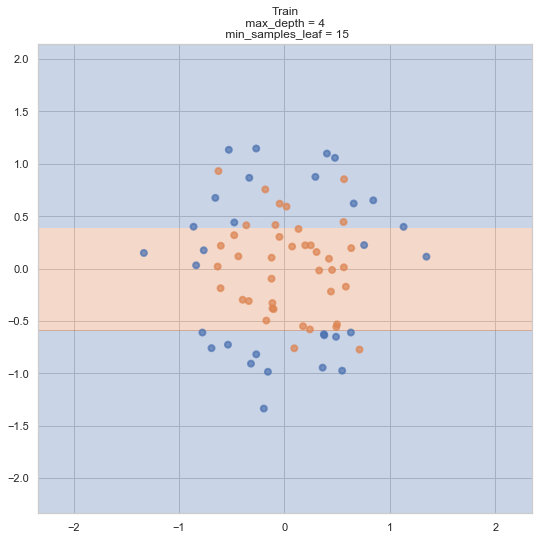

train accuracy = 0.7857142857142857
test accuracy = 0.7


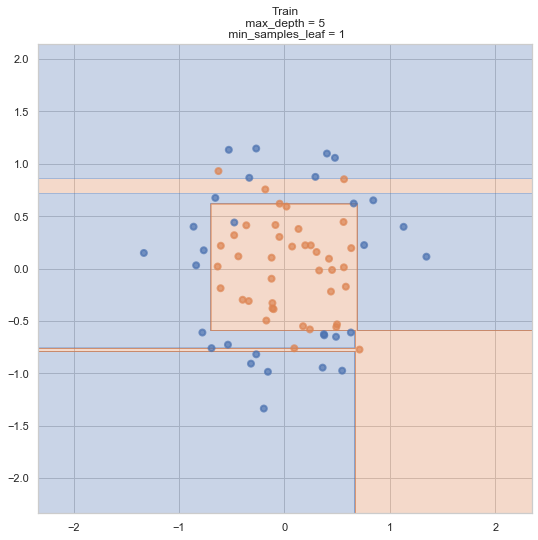

train accuracy = 0.9714285714285714
test accuracy = 0.7666666666666667


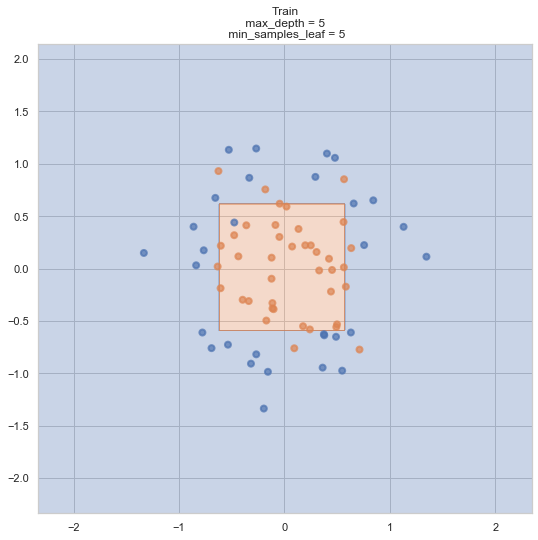

train accuracy = 0.8714285714285714
test accuracy = 0.9


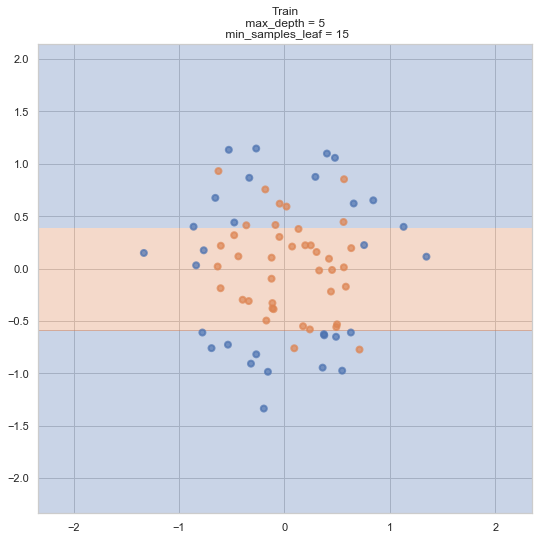

train accuracy = 0.7857142857142857
test accuracy = 0.7


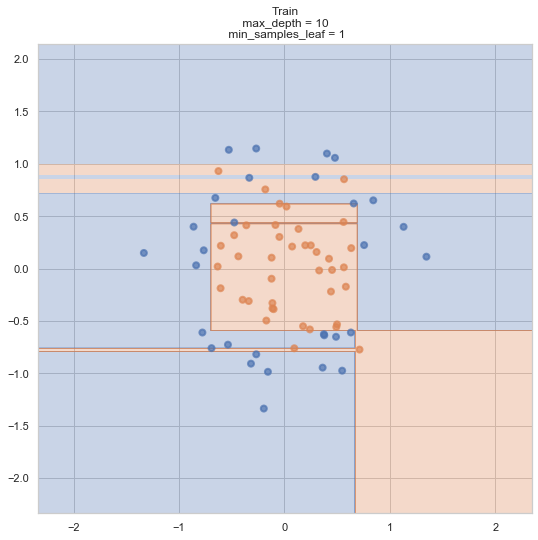

train accuracy = 1.0
test accuracy = 0.7333333333333333


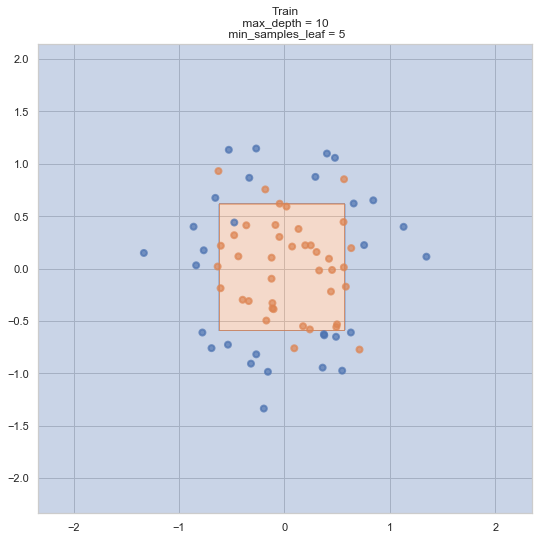

train accuracy = 0.8714285714285714
test accuracy = 0.9


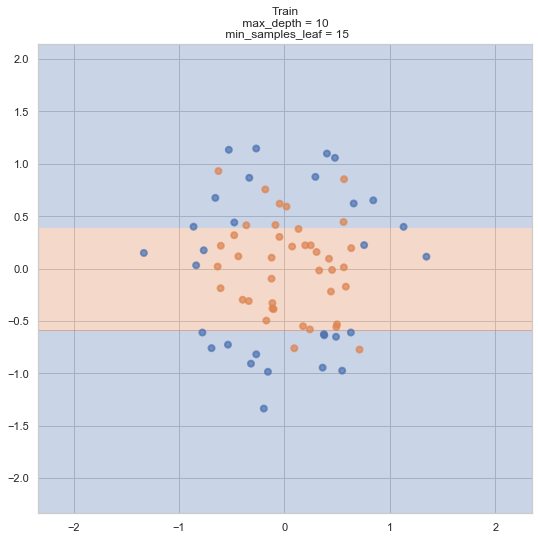

train accuracy = 0.7857142857142857
test accuracy = 0.7
end


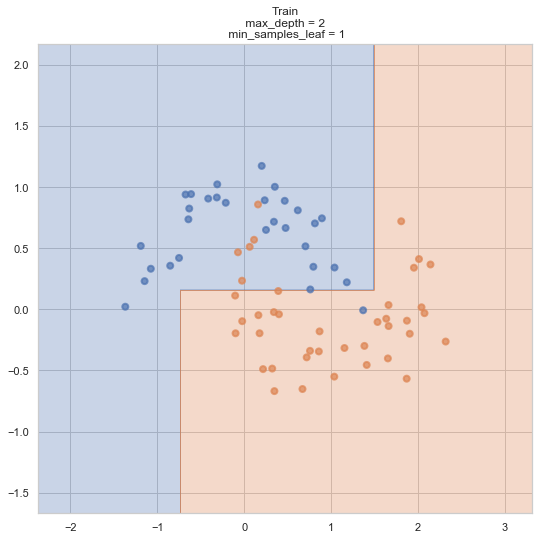

train accuracy = 0.9142857142857143
test accuracy = 0.9333333333333333


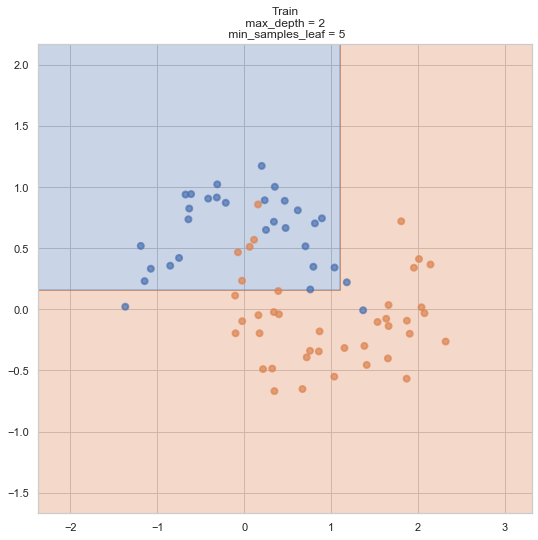

train accuracy = 0.8857142857142857
test accuracy = 0.8


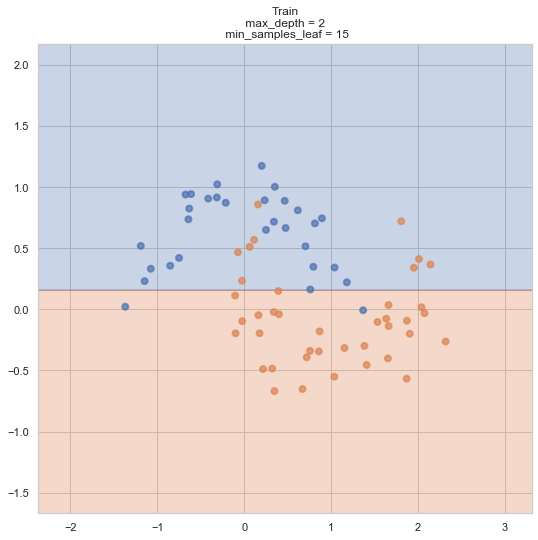

train accuracy = 0.8428571428571429
test accuracy = 0.8


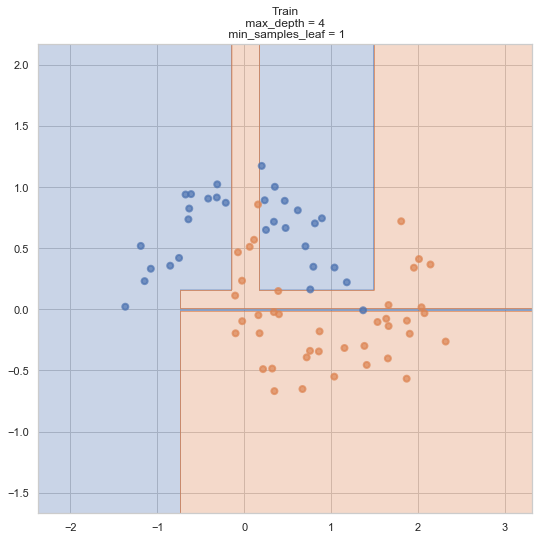

train accuracy = 1.0
test accuracy = 0.8666666666666667


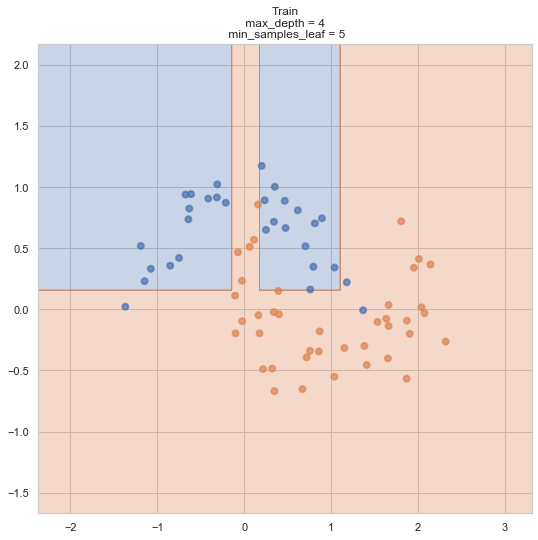

train accuracy = 0.9571428571428572
test accuracy = 0.7333333333333333


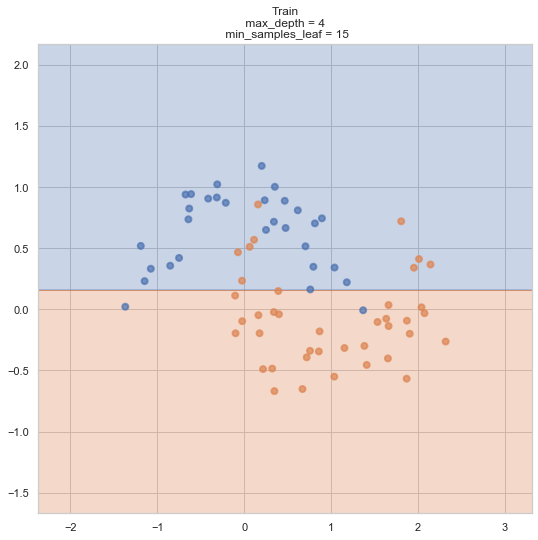

train accuracy = 0.8428571428571429
test accuracy = 0.8


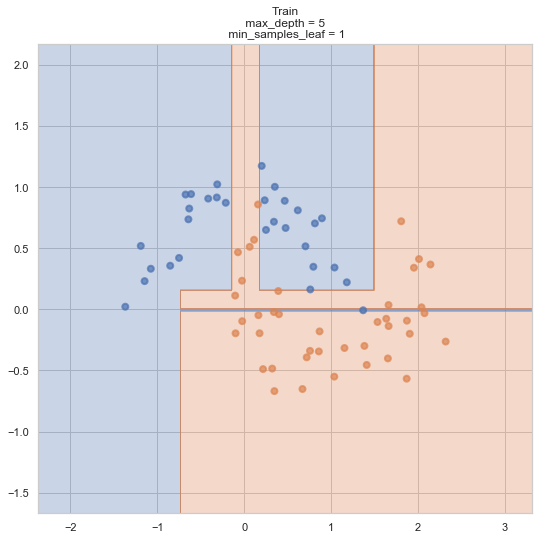

train accuracy = 1.0
test accuracy = 0.8666666666666667


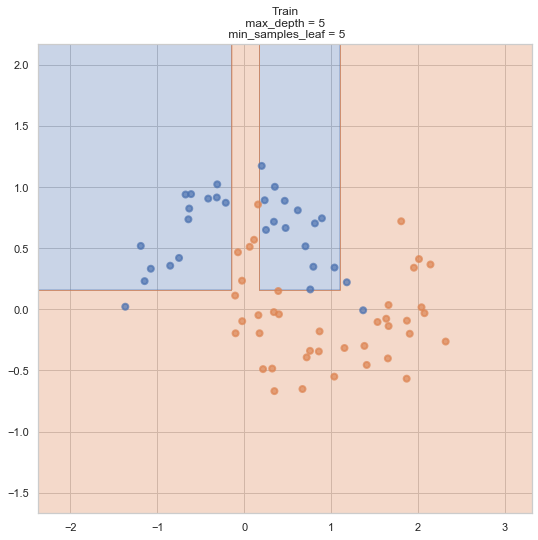

train accuracy = 0.9571428571428572
test accuracy = 0.7333333333333333


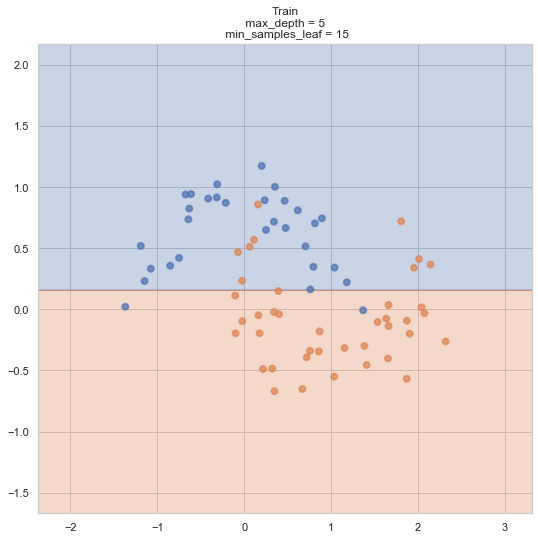

train accuracy = 0.8428571428571429
test accuracy = 0.8


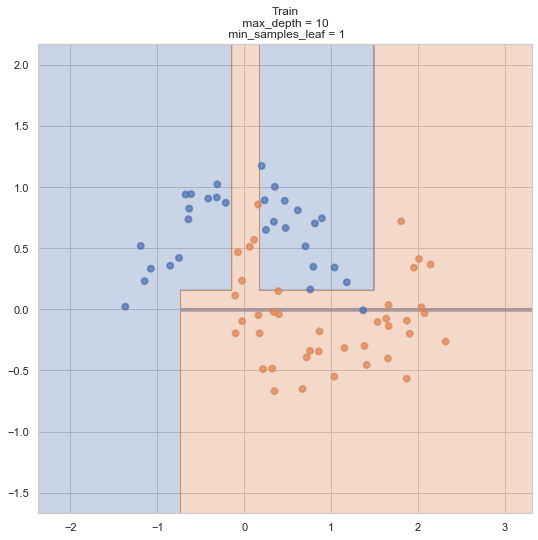

train accuracy = 1.0
test accuracy = 0.8666666666666667


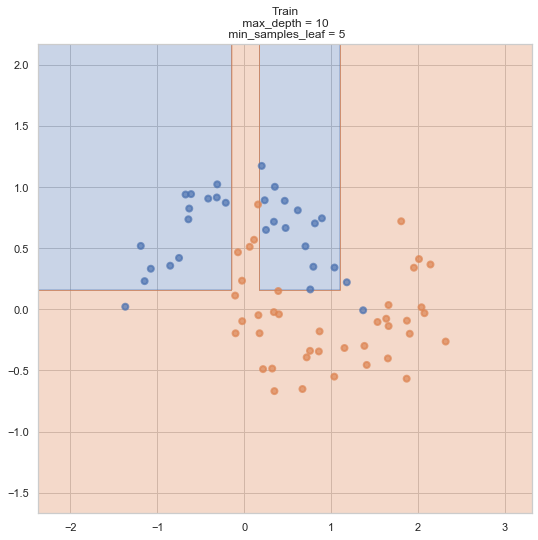

train accuracy = 0.9571428571428572
test accuracy = 0.7333333333333333


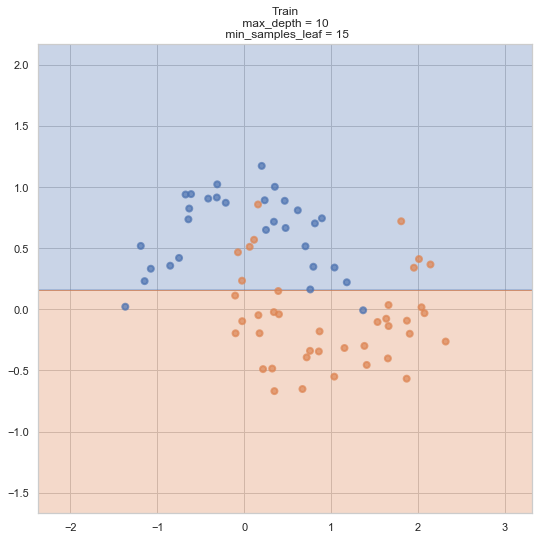

train accuracy = 0.8428571428571429
test accuracy = 0.8
end


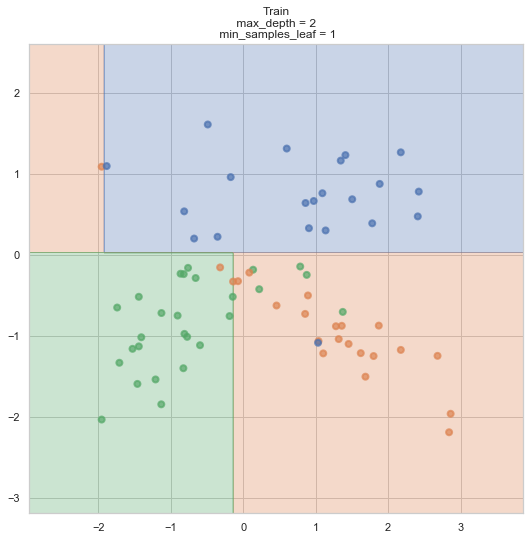

train accuracy = 0.9
test accuracy = 0.7666666666666667


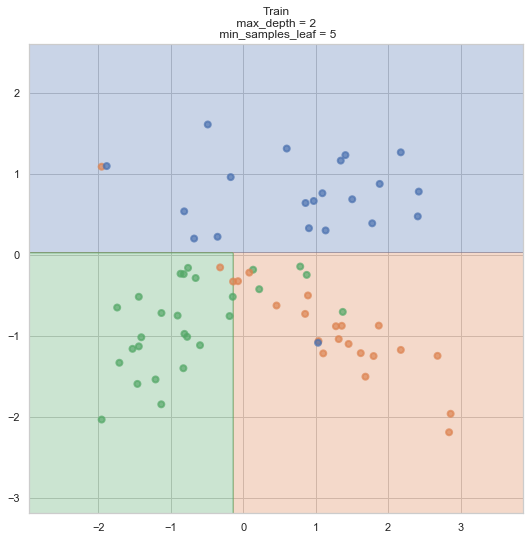

train accuracy = 0.8857142857142857
test accuracy = 0.7666666666666667


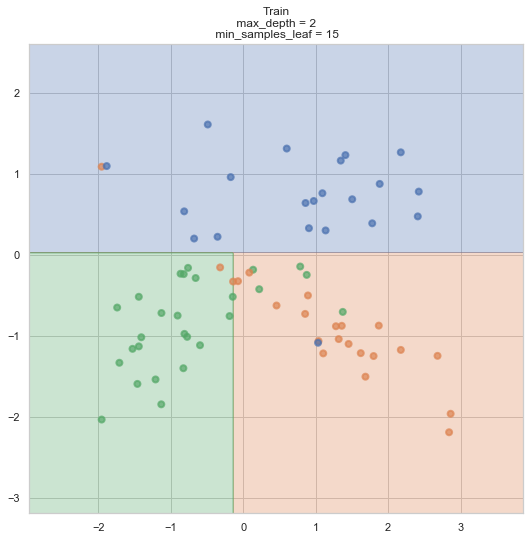

train accuracy = 0.8857142857142857
test accuracy = 0.7666666666666667


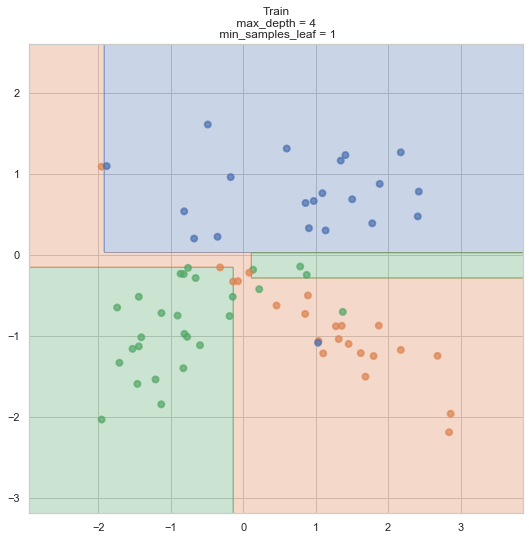

train accuracy = 0.9571428571428572
test accuracy = 0.8333333333333334


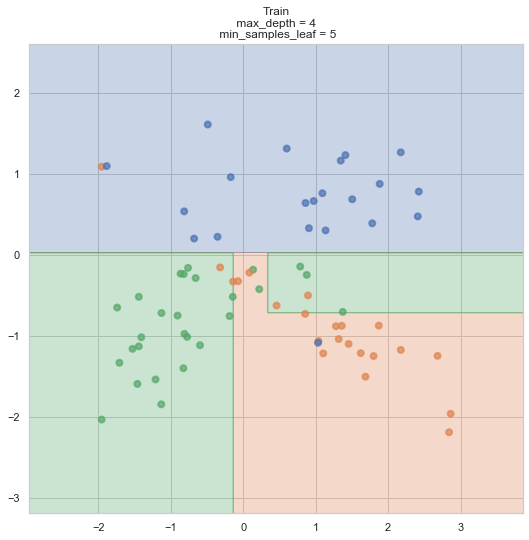

train accuracy = 0.9
test accuracy = 0.7


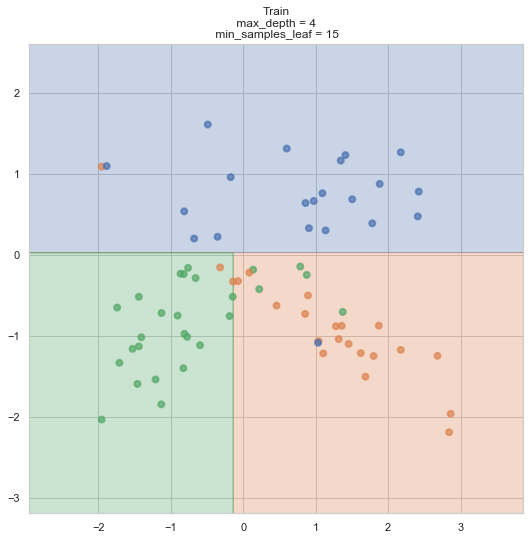

train accuracy = 0.8857142857142857
test accuracy = 0.7666666666666667


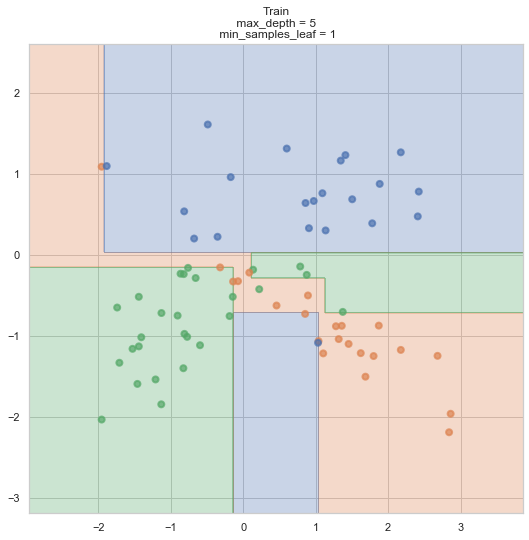

train accuracy = 0.9714285714285714
test accuracy = 0.8


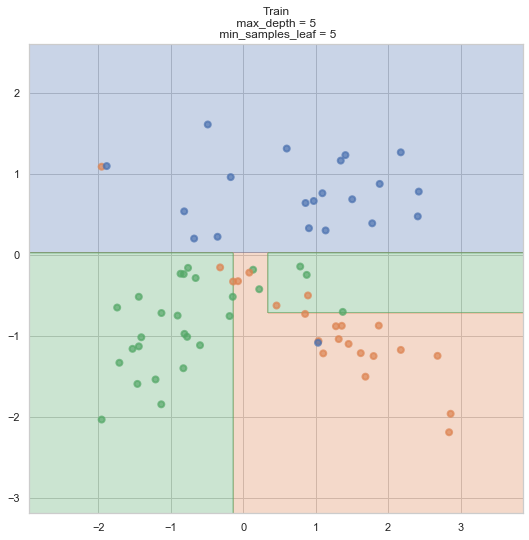

train accuracy = 0.9
test accuracy = 0.7


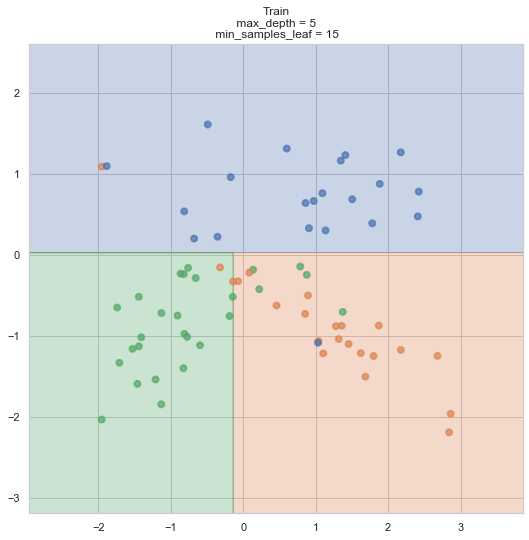

train accuracy = 0.8857142857142857
test accuracy = 0.7666666666666667


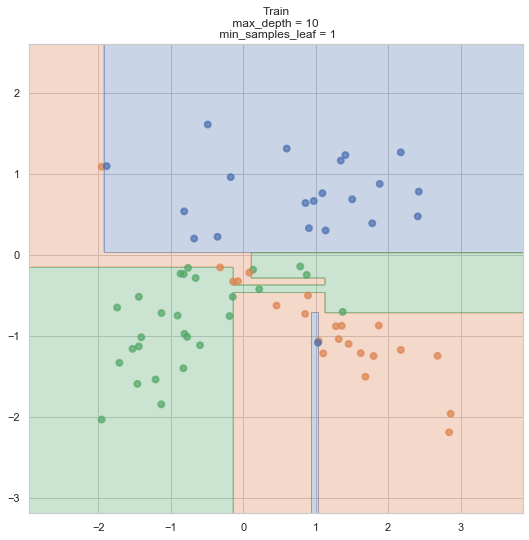

train accuracy = 1.0
test accuracy = 0.8333333333333334


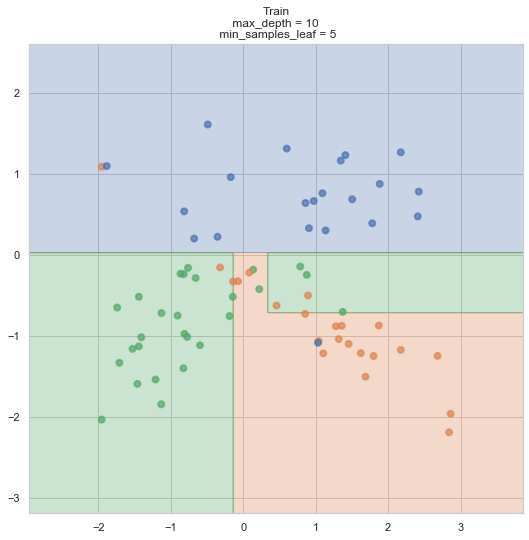

train accuracy = 0.9
test accuracy = 0.7


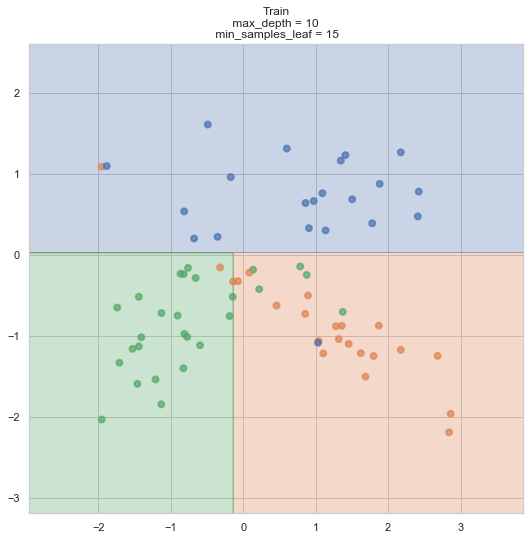

train accuracy = 0.8857142857142857
test accuracy = 0.7666666666666667
end


In [8]:
from tqdm import tqdm
ds = [2, 4, 5, 10]
ls = [1, 5, 15]

for i in range(len(datasets)):
    for d in ds:
        for l in ls:
            X_train, X_test, y_train, y_test = train_test_split(datasets[i][0], datasets[i][1], test_size=0.3, random_state=42)

            clf = DecisionTreeClassifier(max_depth=d, min_samples_leaf=l, random_state=42)
            clf.fit(X_train, y_train)

            plt.figure(figsize=(8, 8))
            plt.title(f"Train\n max_depth = {str(d)} \n min_samples_leaf = {str(l)}")
            plot_surface(clf, X_train, y_train)
            plt.show()
            
            print("train accuracy = ", accuracy_score(y_train, clf.predict(X_train)), sep='') 
            print("test accuracy = ", accuracy_score(y_test, clf.predict(X_test)), sep='')
    print("end")

__Ответ:__ Если у нас будет излишне большой max_depth и излишне маленький min_samples_leaf то произойдет переобучение и наоборот недообучение. Для moon DataSet глубины хватает 2, а другим не хватает. 

По итогу увелечение максимальной глубины и ументшение минимального. количества объектов выборки в листе приводит к увелечению качества на обучаюзейе выборке и переобучению. Так же нам необходима кросс-валидация.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Ссылка: https://contest.yandex.ru/contest/31332/run-report/59278611/ ID: 59278611

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [9]:
import pandas as pd
df = pd.read_csv('students.csv')
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [10]:
X = df.loc[:,'STG':'PEG']
y = df.loc[:, 'UNS']
X_train, X_test, y_train, y_test = train_test_split(X, y)


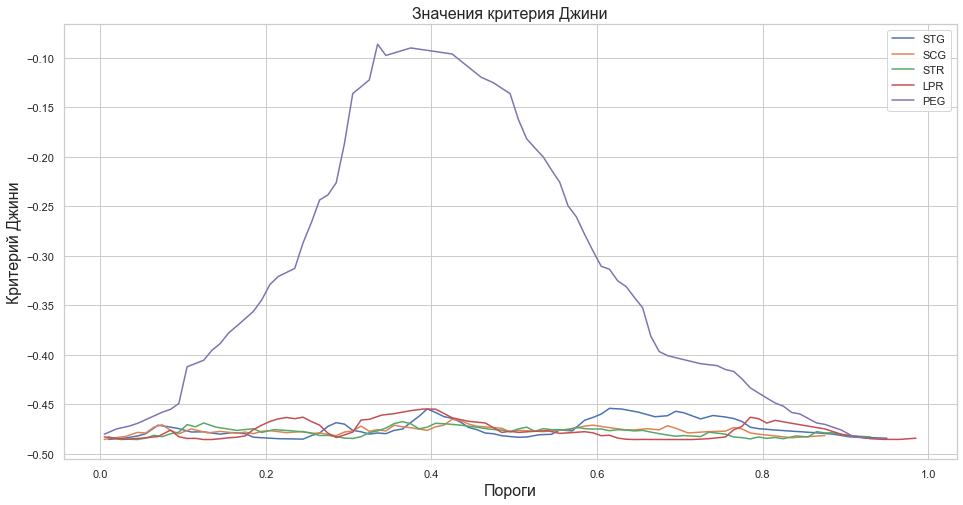

In [11]:
from hw5code import find_best_split

X = df.drop(columns=['UNS'])
y = df['UNS']
plt.figure(figsize=(16, 8))
plt.title("Значения критерия Джини", size=16)

for col in X.columns:
    thresholds, ginis, threshold_best, gini_best  = find_best_split(df[col].to_numpy(),  y.to_numpy())
    plt.plot(thresholds, ginis)
plt.legend(X.columns)
plt.xlabel("Пороги", size=16)
plt.ylabel("Критерий Джини", size=16)
plt.show()

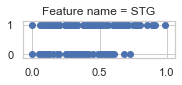

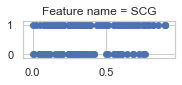

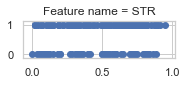

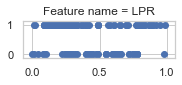

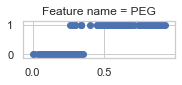

In [12]:
for n, col in enumerate(df.columns[:5]):
    plt.subplot2grid((5, 2), (n, 0))
#     plt.figure(figsize=(4, 4))
    plt.title("Feature name = " + col)
    plt.scatter(X_train.loc[:,col], y_train)
    plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** 

1. PEG.
2. Да. 
3. Первый график близок к 0 при каком-либо значении. У второго вида графиков выборки должны не пересекаться при наложении.
4. Зависит от распределения по классам. Там, где можно поставить порог там повышается первый график. Как с LPR (второй график) при наложении разделить сложно, но так как левее 0.2 много точек 1-ого класса и мало 0-ого, то наш критерий Джинни там и возрастает из-за того, что больше признаков с этим значением <0.2 имеют класс 1, то это деление лучше, чем случайное.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».
 
Ссылка: https://contest.yandex.ru/contest/31332/run-report/59279370/  ID: 59279370

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [13]:
from hw5code import DecisionTree
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [38]:
mushrooms = pd.read_csv("agaricus-lepiota.data")
labelencoder = preprocessing.LabelEncoder()
X = mushrooms.loc[:, 'x':'u']
y = mushrooms.loc[:, 'p']

for col in tqdm(X.columns):
    X[col] = labelencoder.fit_transform(X[col])
y = y.replace({'e': 1, 'p': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
feat = len(X.columns) * ["categorical"]
clf = DecisionTree(feat)
clf.fit(X_train.values, y_train.values)
pred = clf.predict(X_test.values)
accuracy = accuracy_score(pred, y_test.values)
print(f"Accuracy: {accuracy}")

100%|██████████| 22/22 [00:00<00:00, 261.25it/s]


Accuracy: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [33]:
mushrooms = pd.read_csv("agaricus-lepiota.data")
ttts = pd.read_csv("tic-tac-toe.data")
cars = pd.read_csv("car.data")
nurserys = pd.read_csv("nursery.data")
labelEncoder = preprocessing.LabelEncoder()

In [34]:
datasets = []
sk_ac = []
ohe_ac = []
cat_ac = []
r_ac = []
ohe = OneHotEncoder()
X_m = mushrooms.loc[:, 'x':'u']
y_m = mushrooms.loc[:, 'p']
for col in X_m.columns:
    X_m[col] = labelEncoder.fit_transform(X_m[col])

y_m = y_m.replace({'e': 1, 'p': 0})
datasets.append([X_m, y_m])

X_t = ttts.iloc[:, :-1]
y_t = ttts.iloc[:, -1]
for col in X_t.columns:
    X_t[col] = labelEncoder.fit_transform(X_t[col])
y_t = y_t.replace({"positive": 1, "negative": 0})
datasets.append([X_t, y_t])

X_c = cars.iloc[:, : -1]
y_c = cars.iloc[:, -1]
for col in X_c.columns:
    X_c[col] = labelEncoder.fit_transform(X_c[col])
y_c = y_c.replace({"good": 1, "vgood" : 1, "acc": 0, "unacc" : 0})
datasets.append([X_c,y_c])

X_n = nurserys.iloc[:, :-1]
y_n = nurserys.iloc[:, -1]
for col in X_n.columns:
    X_n[col] = labelEncoder.fit_transform(X_n[col])
y_n = y_n.replace({"recommend": 0, "not_recom": 0, "very_recom": 1, "spec_prior": 1, "priority": 1})
datasets.append([X_n, y_n])

In [35]:
for (X,y) in datasets:
    clf = DecisionTreeClassifier()
    acc = np.mean(cross_val_score(clf, X, y, cv=10))
    sk_ac.append(np.mean(acc))
    
    feats = ["categorical"] * len(X.columns)
    tree = DecisionTree(feats)
    acc = cross_val_score(tree, X.values, y.values, cv=10, scoring = make_scorer(accuracy_score))
    cat_ac.append(np.mean(acc))
    
    feats = ["real"] * len(X.columns)
    clf = DecisionTree(feats)
    acc = np.mean(cross_val_score(clf, X.values, y.values, cv=10, scoring = make_scorer(accuracy_score)))
    r_ac.append(np.mean(acc))
    
    X = ohe.fit_transform(X)   
    feats = ["real"] * X.shape[1]
    clf = DecisionTree(feats)
    acc = cross_val_score(clf, X, y.values, cv=10, scoring=make_scorer(accuracy_score))
    ohe_ac.append(np.mean(acc))

In [36]:
d = {"sklearn": sk_ac, "categorical":cat_ac, "real":r_ac, "real_ohe":ohe_ac}
pd.DataFrame(data=d, index=["mushroom", "ttt", "car" , "nursery"])

,sklearn,categorical,real,real_ohe
mushroom,0.962723,1.000000,0.999261,0.210675
ttt,0.792314,0.549265,0.462697,0.651042
car,0.944371,0.967519,0.942600,0.922154
nursery,0.999846,0.999923,0.999846,0.666564


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

Вставьте что угодно, описывающее ваши впечатления от этого задания:


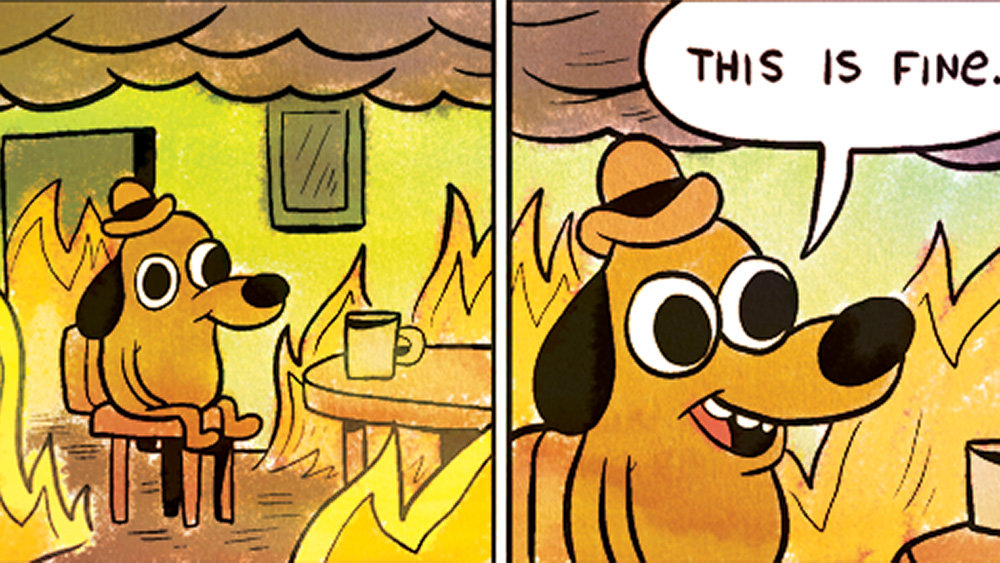

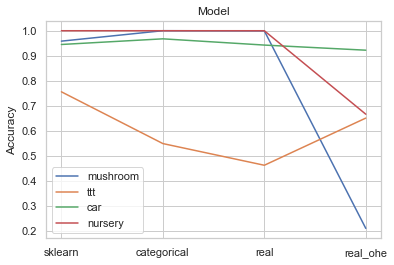

In [40]:
for index, row in df.iterrows():
    plt.plot(row, label=index)

plt.title("Model")
plt.ylabel("Accuracy")
plt.legend()
plt.show()